In [1]:
#-*- coding: utf-8 -*-
##------------------------------------------------------------------------
## Case: Cobrança - Comparação de Técnicas
## Autor: Prof. Roberto Angelo
## Objetivo: Cross-validation e Comparação de Técnicas de aprendizado supervisionado
##------------------------------------------------------------------------

# Bibliotecas padrão
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Carregando os dados
dataset = pd.read_csv('Case_cobranca.csv') 


In [2]:
#------------------------------------------------------------------------------------------
# Pré-processamento das variáveis
#------------------------------------------------------------------------------------------
## Tratamento de nulos no alvo --- Tempo de Atraso - transformação para alvo binário (>90 dias) 
dataset['ALVO']   = [0 if np.isnan(x) or x > 90 else 1 for x in dataset['TEMP_RECUPERACAO']]
## Tratamento de nulos e normalização --- Variáveis de entrada numéricas
dataset['PRE_IDADE']        = [18 if np.isnan(x) or x < 18 else x for x in dataset['IDADE']] # Trata mínimo
dataset['PRE_IDADE']        = [1. if x > 76 else (x-18)/(76-18) for x in dataset['PRE_IDADE']] # Trata máximo por percentil 99 e coloca na fórmula
dataset['PRE_QTDE_DIVIDAS'] = [0.  if np.isnan(x) else x/16. for x in dataset['QTD_DIVIDAS']] # retirada de outlier com percentil 99 e normalização     
##--- Dummies - transformação de atributos categóricos em numéricos e tratamanto de nulos ---------------
dataset['PRE_NOVO']         = [1 if x=='NOVO'                      else 0 for x in dataset['TIPO_CLIENTE']]    
dataset['PRE_TOMADOR_VAZIO']= [1 if x=='TOMADOR' or str(x)=='nan'  else 0 for x in dataset['TIPO_CLIENTE']]                        
dataset['PRE_CDC']          = [1 if x=='CDC'                       else 0 for x in dataset['TIPO_EMPRESTIMO']]
dataset['PRE_PESSOAL']      = [1 if x=='PESSOAL'                   else 0 for x in dataset['TIPO_EMPRESTIMO']]
dataset['PRE_SEXO_M']       = [1 if x=='M'                         else 0 for x in dataset['CD_SEXO']]


In [3]:
##------------------------------------------------------------
## Separando em dados de treinamento e teste
##------------------------------------------------------------
y = dataset['ALVO']              # Carrega alvo ou dataset.iloc[:,7].values
X = dataset.iloc[:, 8:15].values # Carrega colunas 8, 9, 10, 11, 12, 13 e 14 (a 15 não existe até este momento)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 25)


In [4]:
#---------------------------------------------------------------------------
## Calculando a KNN - Aprendizado supervisionado  
#---------------------------------------------------------------------------
from sklearn.neighbors import KNeighborsClassifier

gx = []
gy = []

In [5]:
# Para k=1
Classifier_kNN = KNeighborsClassifier(n_neighbors=1, weights='uniform', algorithm='brute', p=2)
Classifier_kNN.fit(X_train, y_train)
y_pred_test_KNN    = Classifier_kNN.predict(X_test)
Erro_KNN_Classificacao = np.mean(np.absolute(y_pred_test_KNN - y_test))
print('---------------------------------------------------------------')
print('k', 'Erro de Classificação')
print('1',Erro_KNN_Classificacao)
gx.append(1)
gy.append(Erro_KNN_Classificacao)


---------------------------------------------------------------
k Erro de Classificação
1 0.2879837067209776


c:\Users\rafaela.a.dos.santos\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\rafaela.a.dos.santos\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


5 0.2765784114052953
10 0.2765784114052953
15 0.2773930753564155
20 0.2676171079429735
25 0.26965376782077394
30 0.2659877800407332
35 0.2668024439918534
40 0.2615071283095723
45 0.2602851323828921
50 0.2684317718940937
55 0.2659877800407332
60 0.26476578411405294
65 0.2704684317718941
70 0.265173116089613
75 0.2655804480651731
80 0.2676171079429735
85 0.2716904276985743
90 0.2716904276985743
95 0.270061099796334
100 0.2704684317718941
105 0.27128309572301423
110 0.26965376782077394
115 0.2668024439918534
120 0.26924643584521385
125 0.2745417515274949
130 0.2729124236252546
135 0.2729124236252546
140 0.27413441955193485
145 0.27128309572301423
150 0.27494908350305497
155 0.27372708757637476
160 0.2716904276985743
165 0.2725050916496945
170 0.2720977596741344
175 0.2720977596741344
180 0.2725050916496945
185 0.2720977596741344
190 0.2720977596741344
195 0.2725050916496945
200 0.2733197556008147
---------------------------------------------------------------
------------------------- Grá

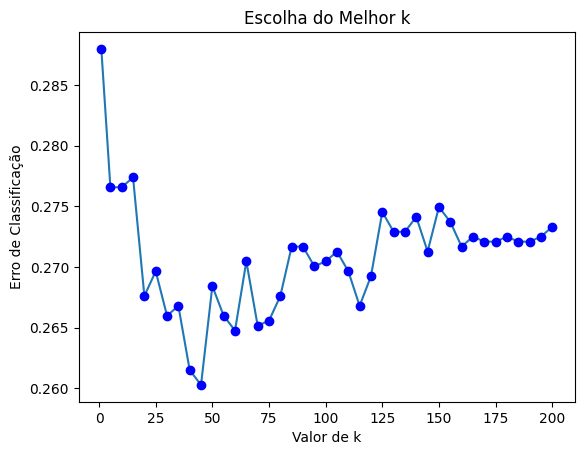

In [6]:
## Loop para achar o melhor k
for k in range(5, 201, 5):
    Classifier_kNN = KNeighborsClassifier(n_neighbors=k, weights='uniform', algorithm='brute', p=2)
    Classifier_kNN.fit(X_train, y_train)
    y_pred_test_KNN    = Classifier_kNN.predict(X_test)

    ## Cálculo dos erros da classificação e Matriz de confusão da RNA
    Erro_KNN_Classificacao = np.mean(np.absolute(y_pred_test_KNN - y_test))
    print(k,Erro_KNN_Classificacao)
    
    gx.append(k)
    gy.append(Erro_KNN_Classificacao)
print('---------------------------------------------------------------')


print('------------------------- Gráfico -----------------------------')
print()
plt.plot(gx,gy)
plt.plot(gx,gy, 'bo') 
plt.title('Escolha do Melhor k')
plt.ylabel('Erro de Classificação')
plt.xlabel('Valor de k')
plt.show()
